# Final Research note code 

Luis Fernando Ramirez Ruiz

github user: lramir14

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Check the files in your Google Drive (optional)
import os
os.listdir('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ZEE',
 'Transparencia Mexicana',
 'ITAM',
 'UNAM',
 'Artículos Gaceta',
 'Estadística',
 'Mex 1o',
 'Servicio Social ',
 'Eco Pol II Resúmenes.gdoc',
 'métodos Vidal .gdoc',
 'Ciudades Plurales.gdoc',
 'noticias elecciones 31 01 2017.gdoc',
 'Tema de investigación métodos Vidal .gdoc',
 'Participación Ballinas.gdoc',
 'Carta motivos Integralia.gdoc',
 'Filosofía de la historia  (1).gdoc',
 'Intro análisis de Datos.gdoc',
 'Nuevo Proyecto Vidal .gdoc',
 'Presentación sin título (3).gslides',
 'Editorial Elecciones.gdoc',
 'Ciudades Plurales Nota Informativa.gdoc',
 'Casos entrevistas Mckinsey .gdoc',
 'Ensayo 1 Downs .gdoc',
 'Estadística Bayesiana.gdoc',
 'Integración Ciudades Plurales .gdoc',
 'Kant-Aristóteles .gdoc',
 'Control 2 Filociencia.gdoc',
 'Filociencia resumen 3 .gdoc',
 'converse 67 op publ.gdoc',
 'Sesión 17.gdoc',
 'Entrevista Ing. Agua.gdoc',
 'Ensayo 2 Moreno Opinión .gdoc',
 'Taller R .gdoc',
 'Ensayo Moreno 2.gdoc',
 'Tesis KANT .gdoc',
 '"Plurales 

In [ ]:
# Define the path to your CSV file
csv_file_path = '/content/drive/MyDrive/full_data_updated_24.csv'
# Import pandas and read the CSV file
import pandas as pd
data = pd.read_csv(csv_file_path)

# Display the first few rows of the data to verify
print(data.head())
print(len(data))
print(data.info)

   Unnamed: 0  X  speech_id  \
0           1  1          1   
1           2  2          2   
2           3  3          3   
3           4  4          4   
4           5  5          5   

                                               title  \
0  Versión estenográfica de la conferencia de pre...   
1  Versión estenográfica de la conferencia de pre...   
2  Versión estenográfica. Aniversario de la Huelg...   
3  Versión estenográfica. Programas para el Biene...   
4  Versión estenográfica. Programas para el Biene...   

                                                urls  \
0  https://lopezobrador.org.mx/2024/01/09/version...   
1  https://lopezobrador.org.mx/2024/01/08/version...   
2  https://lopezobrador.org.mx/2024/01/07/version...   
3  https://lopezobrador.org.mx/2024/01/06/version...   
4  https://lopezobrador.org.mx/2024/01/06/version...   

                                             content        date  
0  2024: Año de Felipe Carrillo Puerto, benemérit...  2024-01-09  
1  20

## Pre-process data

In [ ]:
import spacy

# Install a larger model (medium or large version) for GPU usage
!python -m spacy download es_core_news_md

# Load the medium version of the Spanish language model
nlp = spacy.load('es_core_news_md')

# Verify if the model is using the GPU by processing some text
doc = nlp("Este es un texto de prueba para verificar si SpaCy está usando el GPU.")
print(f"Processed text: {doc.text}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Processed text: Este es un texto de prueba para verificar si SpaCy está usando el GPU.


In [ ]:
import torch

# Check if GPU is available in PyTorch (since SpaCy relies on CUDA through PyTorch)
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available, using CPU.")



GPU is available!
Using GPU: Tesla T4


In [ ]:
from tqdm.notebook import tqdm  # Import tqdm for notebook environments
import spacy
import pandas as pd

# Load the Spanish language model
nlp = spacy.load('es_core_news_md')

# Preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)  # Return as a string of tokens

# Wrap the content column with tqdm manually
processed_content = []
for text in tqdm(data['content'], desc="Processing Content"):
    processed_content.append(preprocess_text(text))

# Add results back to DataFrame
data['processed_content'] = processed_content

# Verify results
print(data.head())
print("Preprocessing completed!")


Processing Content:   0%|          | 0/2363 [00:00<?, ?it/s]

   Unnamed: 0  X  speech_id  \
0           1  1          1   
1           2  2          2   
2           3  3          3   
3           4  4          4   
4           5  5          5   

                                               title  \
0  Versión estenográfica de la conferencia de pre...   
1  Versión estenográfica de la conferencia de pre...   
2  Versión estenográfica. Aniversario de la Huelg...   
3  Versión estenográfica. Programas para el Biene...   
4  Versión estenográfica. Programas para el Biene...   

                                                urls  \
0  https://lopezobrador.org.mx/2024/01/09/version...   
1  https://lopezobrador.org.mx/2024/01/08/version...   
2  https://lopezobrador.org.mx/2024/01/07/version...   
3  https://lopezobrador.org.mx/2024/01/06/version...   
4  https://lopezobrador.org.mx/2024/01/06/version...   

                                             content        date  \
0  2024: Año de Felipe Carrillo Puerto, benemérit...  2024-01-09   
1  

In [ ]:
data.to_csv('/content/drive/MyDrive/full_data_preprocessed.csv', index=False)

In [ ]:
from tqdm.notebook import tqdm  # Import tqdm for notebook environments
import spacy
import pandas as pd

# Load the Spanish language model
nlp = spacy.load('es_core_news_md')

# Preprocessing function with bigram generation
def preprocess_text_with_bigrams(text):
    # Tokenize and filter words using spaCy
    doc = nlp(text.lower())  # Convert to lowercase
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

    # Generate bigrams
    bigrams = ["_".join(pair) for pair in zip(tokens, tokens[1:])]  # Join consecutive words with '_'

    # Combine unigrams (individual words) and bigrams
    combined_tokens = tokens + bigrams  # Optionally keep unigrams AND bigrams

    return " ".join(combined_tokens)  # Return as a single string

# Apply the preprocessing function to the content column
processed_content = []
for text in tqdm(data['content'], desc="Processing Content"):
    processed_content.append(preprocess_text_with_bigrams(text))

# Add results back to DataFrame
data['processed_content'] = processed_content

# Verify results
print(data.head())
print("Preprocessing with bigrams completed!")


Processing Content:   0%|          | 0/2363 [00:00<?, ?it/s]

   Unnamed: 0  X  speech_id  \
0           1  1          1   
1           2  2          2   
2           3  3          3   
3           4  4          4   
4           5  5          5   

                                               title  \
0  Versión estenográfica de la conferencia de pre...   
1  Versión estenográfica de la conferencia de pre...   
2  Versión estenográfica. Aniversario de la Huelg...   
3  Versión estenográfica. Programas para el Biene...   
4  Versión estenográfica. Programas para el Biene...   

                                                urls  \
0  https://lopezobrador.org.mx/2024/01/09/version...   
1  https://lopezobrador.org.mx/2024/01/08/version...   
2  https://lopezobrador.org.mx/2024/01/07/version...   
3  https://lopezobrador.org.mx/2024/01/06/version...   
4  https://lopezobrador.org.mx/2024/01/06/version...   

                                             content        date  \
0  2024: Año de Felipe Carrillo Puerto, benemérit...  2024-01-09   
1  

In [ ]:
# Define the path where you want to save the file
output_csv_path = '/content/drive/MyDrive/full_data_preprocessed.csv'

# Save the DataFrame to a new CSV file
data.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"File saved successfully to {output_csv_path}")


File saved successfully to /content/drive/MyDrive/full_data_preprocessed2.csv


In [2]:
# Define the path to your CSV file
output_file_path = '/content/drive/MyDrive/full_data_preprocessed.csv'
# Import pandas and read the CSV file
import pandas as pd
data = pd.read_csv(output_file_path)

# Display the first few rows of the data to verify
print(data.head())
print(len(data))
print(data.info)

   Unnamed: 0  X  speech_id  \
0           1  1          1   
1           2  2          2   
2           3  3          3   
3           4  4          4   
4           5  5          5   

                                               title  \
0  Versión estenográfica de la conferencia de pre...   
1  Versión estenográfica de la conferencia de pre...   
2  Versión estenográfica. Aniversario de la Huelg...   
3  Versión estenográfica. Programas para el Biene...   
4  Versión estenográfica. Programas para el Biene...   

                                                urls  \
0  https://lopezobrador.org.mx/2024/01/09/version...   
1  https://lopezobrador.org.mx/2024/01/08/version...   
2  https://lopezobrador.org.mx/2024/01/07/version...   
3  https://lopezobrador.org.mx/2024/01/06/version...   
4  https://lopezobrador.org.mx/2024/01/06/version...   

                                             content        date  \
0  2024: Año de Felipe Carrillo Puerto, benemérit...  2024-01-09   
1  

## Converting data into a corpus and dictionary

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Use the 'processed_content' column
texts = data['processed_content']

# Convert the preprocessed text to a document-term matrix (BoW)
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(texts)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Display top words for each topic
vocab = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [vocab[i] for i in topic.argsort()[-10:]])


Topic 0:  ['ciento', 'guardia', 'lópez', 'manuel', 'millones', 'gobierno', 'seguridad', 'nacional', 'presidente', 'mil']
Topic 1:  ['gente', 'caso', 'pregunta', 'méxico', 'gobierno', 'andrés', 'obrador', 'manuel', 'lópez', 'presidente']
Topic 2:  ['bienestar', 'ciento', 'presidente', 'atención', 'especialistas', 'hospital', 'hospitales', 'imss', 'médicos', 'salud']
Topic 3:  ['país', 'empresas', 'federal', 'petróleo', 'comisión', 'eléctrica', 'electricidad', 'energía', 'méxico', 'aeropuerto']
Topic 4:  ['gracias', 'vacuna', 'covid', 'vacunas', 'lópez', 'mil', 'personas', 'salud', 'méxico', 'presidente']
Topic 5:  ['encinas', 'nacional', 'gobierno', 'igualdad', 'humanos', 'personas', 'búsqueda', 'derechos', 'violencia', 'mujeres']
Topic 6:  ['mil', 'andrés', 'manuel', 'obrador', 'lópez', 'precio', 'méxico', 'centavos', 'pesos', 'presidente']
Topic 7:  ['pueblo', 'caso', 'tren', 'méxico', 'mil', 'obrador', 'andrés', 'manuel', 'lópez', 'presidente']
Topic 8:  ['democracia', 'pueblos', 'ma

In [ ]:
!pip install numpy==1.23.5
!pip install matplotlib==3.6.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2024.10.0 requires numpy>=1.24, but you have numpy 1.23.5 whi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 107.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires matplotlib>=3.7.1, but you have matplotlib 3.6.0 which is incompatible.
bigframes 1.27.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
plotnine 0.14.3 requires matplotlib>=3.8.0, but you have matplotlib 3.6.0 which is incompatible.


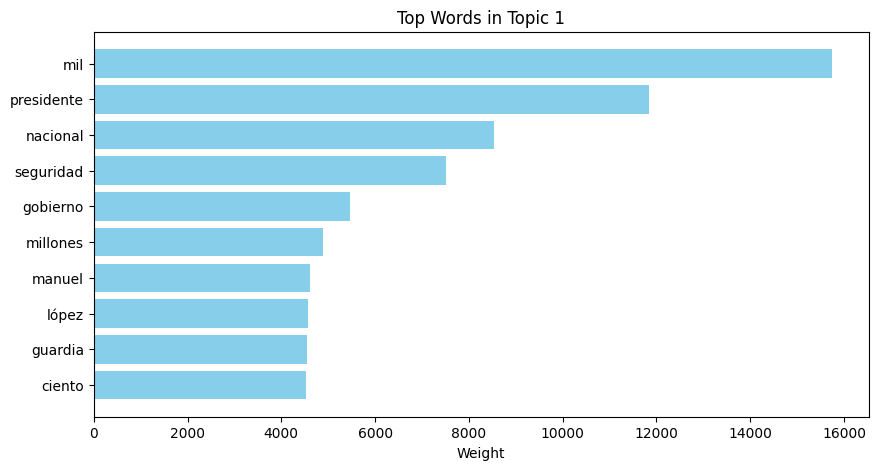

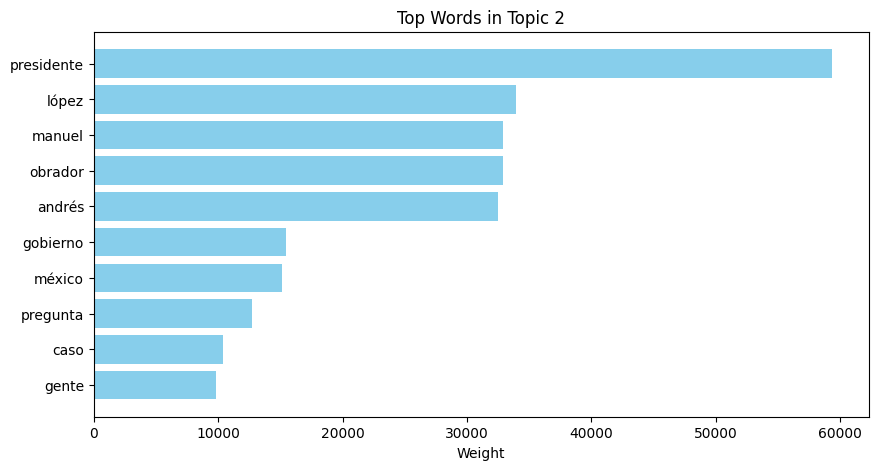

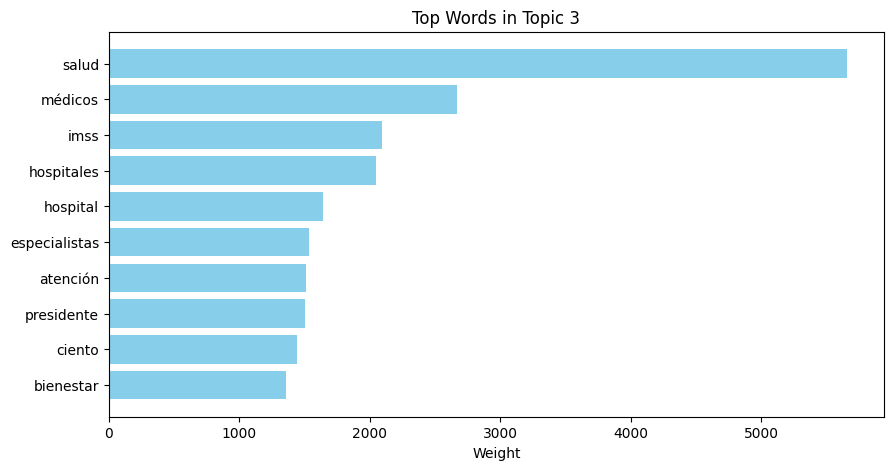

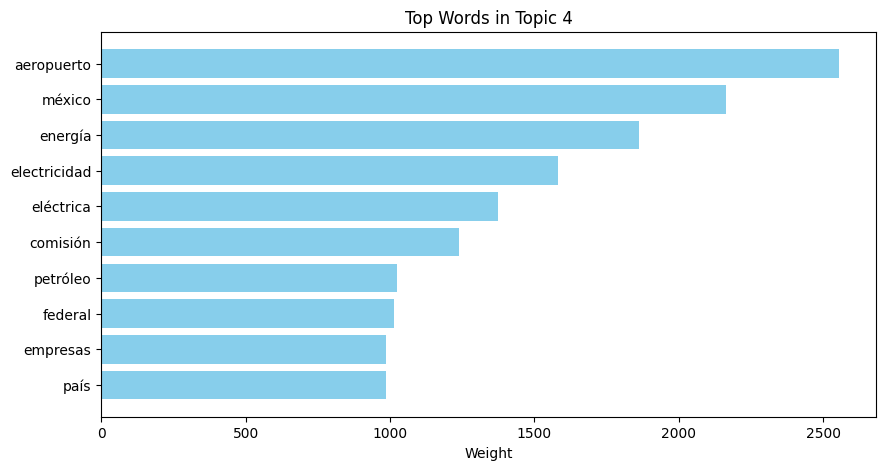

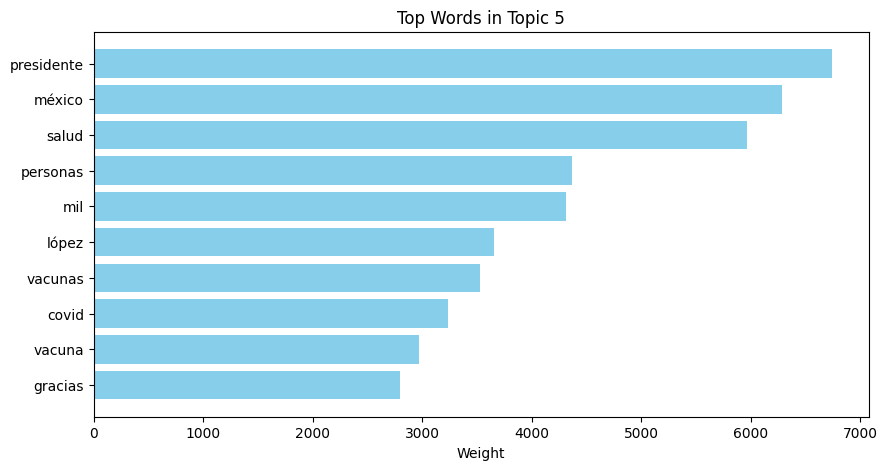

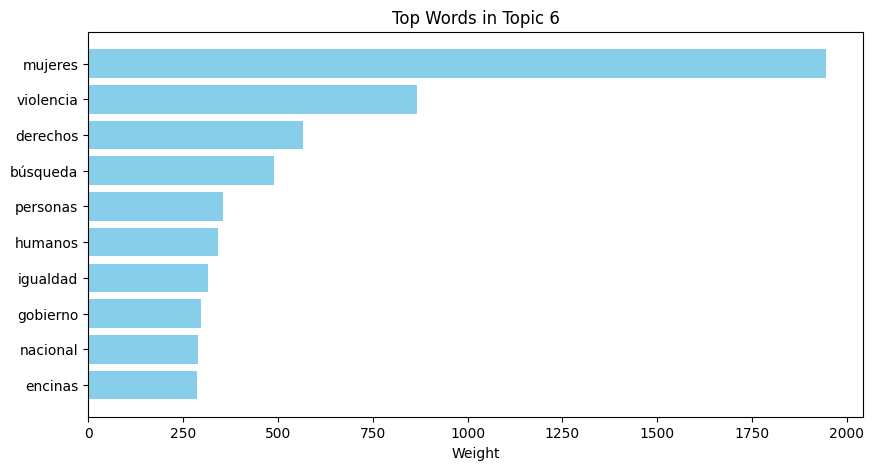

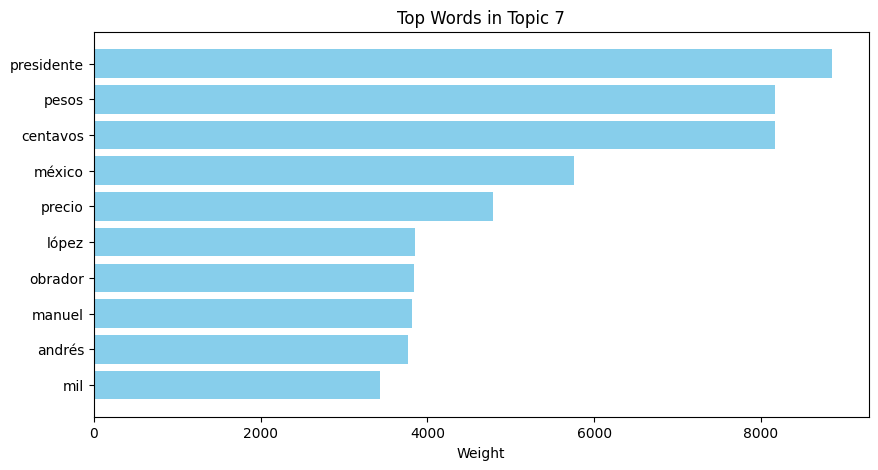

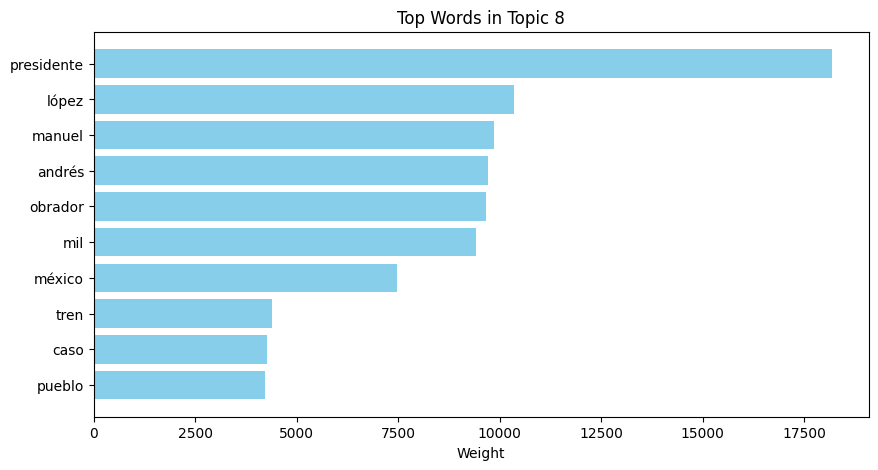

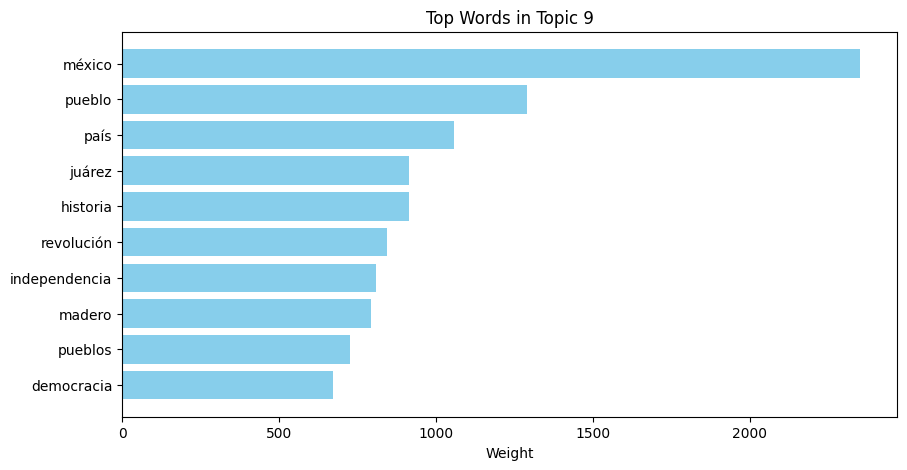

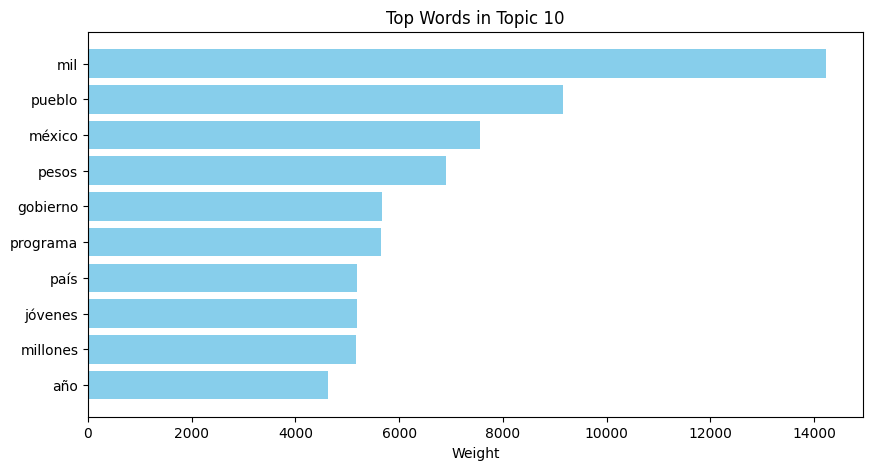

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the vocabulary and the topics
vocab = vectorizer.get_feature_names_out()

# Number of topics in the model
num_topics = lda.n_components

# Visualize top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]  # Get the indices of the top 10 words
    top_words = [vocab[i] for i in top_words_idx]
    top_weights = topic[top_words_idx]

    # Plot the bar chart for the top words and their weights
    plt.figure(figsize=(10, 5))
    plt.barh(top_words, top_weights, color='skyblue')
    plt.xlabel('Weight')
    plt.title(f'Top Words in Topic {topic_idx + 1}')
    plt.gca().invert_yaxis()  # Invert the y-axis so the top word is at the top
    plt.show()


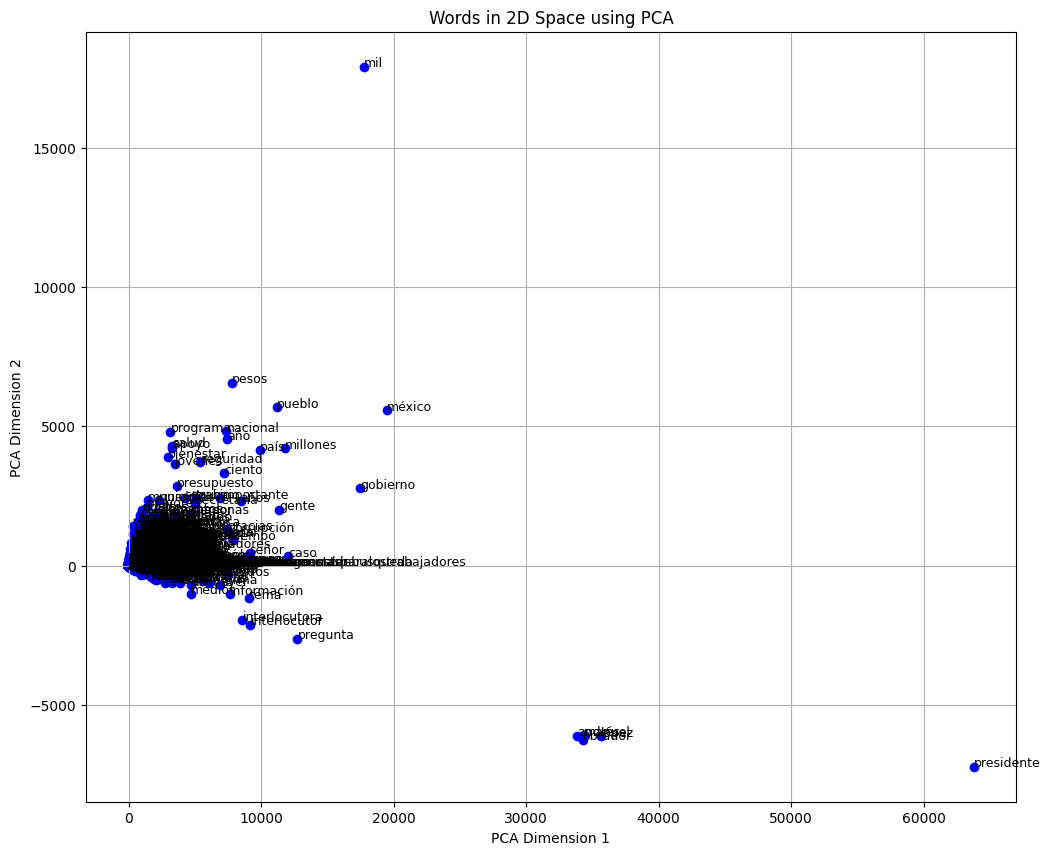

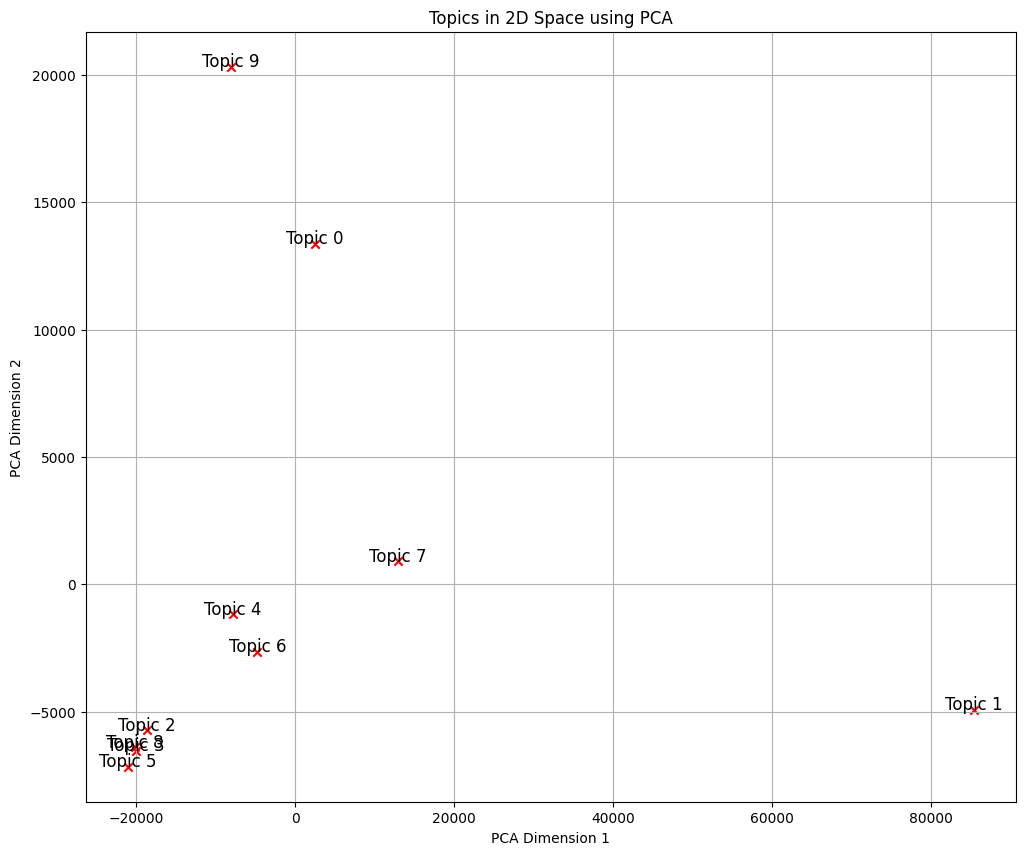

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#Experiment with 10 topics
# Step 1: Obtain the topic-word matrix
topic_word_matrix = lda.components_

# Step 2: Apply PCA to reduce the dimensionality of the topic-word matrix to 2D
pca = PCA(n_components=2)
topic_word_2d_pca = pca.fit_transform(topic_word_matrix.T)  # Transpose to treat words as data points

# Step 3: Plot the words in the 2D space
plt.figure(figsize=(12, 10))
plt.scatter(topic_word_2d_pca[:, 0], topic_word_2d_pca[:, 1], marker='o', c='blue')

# Add labels for words
vocab = vectorizer.get_feature_names_out()
for i, word in enumerate(vocab):
    plt.text(topic_word_2d_pca[i, 0], topic_word_2d_pca[i, 1], word, fontsize=9, color='black')

plt.title('Words in 2D Space using PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()

# Step 4: Apply PCA to reduce the dimensionality of the topics and visualize in 2D
topic_2d_pca = pca.fit_transform(topic_word_matrix)  # Apply PCA to the topics

# Plot the topics in 2D
plt.figure(figsize=(12, 10))
plt.scatter(topic_2d_pca[:, 0], topic_2d_pca[:, 1], marker='x', c='red')

for i, topic in enumerate(topic_2d_pca):
    plt.text(topic_2d_pca[i, 0], topic_2d_pca[i, 1], f'Topic {i}', fontsize=12, ha='center', color='black')

plt.title('Topics in 2D Space using PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()


##Main Results

In [1]:
import os
#print("File exists:", os.path.exists(output_csv_path))
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/

# Define the path to your CSV file
output_file_path = '/content/drive/MyDrive/full_data_preprocessed.csv'
# Import pandas and read the CSV file
import pandas as pd
data = pd.read_csv(output_file_path)

# Display the first few rows of the data to verify
print(data.head())
print(len(data))
print(data.info)

Mounted at /content/drive
'1976-2016-president por Estado.csv'
 20220401112654-415050432-01004.xml
 2242664278_protegido.pdf
'30_01_Andrea Piatesi_checked.docx'
'5th force slides.gslides'
'Actividad-Estadística (1).docx'
'Adriana - Sugerencia.gdoc'
'Advanced Econ | Labelling.gdoc'
'Agenda IMEF.gdoc'
'AI for forecasts and extreme events.gdoc'
'Alineación estratégica de todos los miembros del equipo de Prospera Q2, Q3 y Q4 2018 y Q1 2019.gdoc'
'Alineación estratégica LF Q1 2019.gdoc'
'AMLO, El Privilegio de Enganar (Hiriart).gdoc'
'Análisis de las plataformas de los partidos políticos.docx'
'Análisis por sección '
'análisis voto duro'
'anarquismo epistemologico piloto.gdoc'
 anes2012.do
 applied_netw.ipynb
'Artículos Gaceta'
 Austerity_hertie_notes.gdoc
'Australia .gdoc'
'Backlog 1 .gsheet'
'Base voto republicano por estado.xlsx'
'BASF - Primer.gslides'
'B-D WJP 3.gsheet'
'BecarioSNI (1).gdoc'
 BecarioSNI.docx
 BecarioSNI.gdoc
'Bibliografía Tesis.docx'
'Bibliografía Tesis.gd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define noise words
custom_stop_words = ['presidente', 'andrés', 'méxico', 'lópez', 'obrador', 'manuel', 'pesos', 'mil', 'año', 'caso']

# Combine custom stop words with English stop words
stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words

# Use the 'processed_content' column
texts = data['processed_content']

# Convert the preprocessed text to a document-term matrix (BoW), including stop words
vectorizer = CountVectorizer(stop_words=stop_words)  # Add stop_words parameter
dtm = vectorizer.fit_transform(texts)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(dtm)

# Display top words for each topic
vocab = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: ", [vocab[i] for i in topic.argsort()[-7:]])


Topic 0:  ['elementos', 'millones', 'secretaría', 'personas', 'guardia', 'nacional', 'seguridad']
Topic 1:  ['gobierno', 'vacunación', 'covid', 'vacuna', 'vacunas', 'personas', 'salud']
Topic 2:  ['millones', 'país', 'tema', 'gracias', 'gobierno', 'salud', 'pregunta']
Topic 3:  ['interlocutora', 'millones', 'interlocutor', 'pregunta', 'gente', 'pueblo', 'gobierno']
Topic 4:  ['bienestar', 'jóvenes', 'millones', 'programa', 'país', 'gobierno', 'pueblo']
Topic 5:  ['millones', 'kilómetros', 'obra', 'zona', 'aeropuerto', 'maya', 'tren']
Topic 6:  ['litro', 'gobierno', 'pemex', 'ciento', 'gas', 'precio', 'centavos']


<ipython-input-3-cce8f5e24821>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_topics)  # Get a colormap for topics


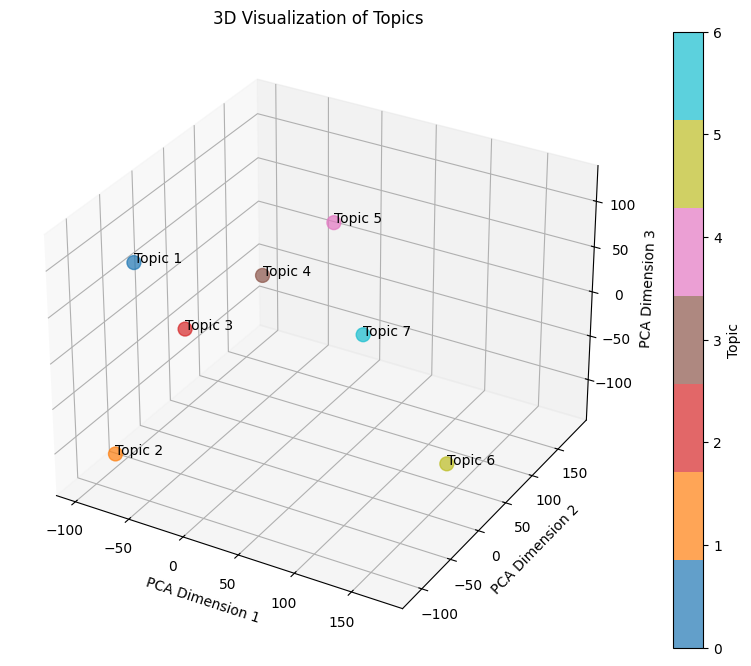

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define custom stopwords
custom_stop_words = [
    'presidente', 'andrés', 'méxico', 'lópez', 'obrador',
    'manuel', 'pesos', 'mil', 'año', 'caso'
]

# Combine custom stopwords with English stopwords
stop_words = list(ENGLISH_STOP_WORDS) + custom_stop_words

# Use the 'processed_content' column
texts = data['processed_content']

# Convert the preprocessed text to a document-term matrix (BoW) with stopwords
vectorizer = CountVectorizer(stop_words=stop_words)
dtm = vectorizer.fit_transform(texts)

# Define the number of topics
num_topics = 7  # Number of topics to visualize

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)  # Assuming dtm is your document-term matrix

# Step 2: Extract the topic-word distribution matrix
topic_word_matrix = lda.components_  # Shape: (num_topics, num_words)

# Step 3: Scale the topic-word distribution matrix
scaler = StandardScaler()

# Normalize the topic-word matrix (shape: num_topics x num_words)
topic_word_matrix_scaled = scaler.fit_transform(topic_word_matrix.T).T  # Transpose, scale, then transpose back

# Step 4: Apply PCA to the scaled topic-word distribution matrix
pca = PCA(n_components=3)  # Reduce to 3 components
topic_vectors = pca.fit_transform(topic_word_matrix_scaled)  # Shape will be (num_topics, 3)

# Step 5: Visualize the topics in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of topics in the reduced 3D space
cmap = plt.cm.get_cmap('tab10', num_topics)  # Get a colormap for topics
scatter = ax.scatter(
    topic_vectors[:, 0],  # PCA component 1
    topic_vectors[:, 1],  # PCA component 2
    topic_vectors[:, 2],  # PCA component 3
    c=np.arange(num_topics),  # Assign a color to each topic
    cmap=cmap,  # Colormap
    s=100,
    alpha=0.7
)

# Add labels for each topic
for i in range(num_topics):
    ax.text(
        topic_vectors[i, 0],
        topic_vectors[i, 1],
        topic_vectors[i, 2],
        f'Topic {i + 1}',  # Label each topic
        fontsize=10,
        color='black'
    )

# Set axis labels
ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')

# Title of the plot
ax.set_title('3D Visualization of Topics')

# Add a colorbar to show which color corresponds to which topic
plt.colorbar(scatter, ax=ax, label="Topic")

# Show the plot
plt.show()


In [4]:
import pandas as pd

# Step 1: Get the vocabulary (list of words)
vocab = vectorizer.get_feature_names_out()  # Assuming 'vectorizer' is your CountVectorizer object

# Step 2: Prepare a list to hold the top words for each topic
top_n = 10  # Number of top words to extract per topic
top_words_per_topic = []

# Extract top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-top_n:][::-1]  # Indices of the top N words for each topic
    top_words = [vocab[i] for i in top_indices]  # Get the words corresponding to the top indices
    top_words_per_topic.append(top_words)

# Step 3: Create a DataFrame with the top words for each topic
topics_df = pd.DataFrame(top_words_per_topic, columns=[f"Word {i+1}" for i in range(top_n)])

# Step 4: Transpose the DataFrame to make words as rows and topics as columns
topics_df_transposed = topics_df.T

# Rename the transposed DataFrame columns to Topic 1, Topic 2, etc.
topics_df_transposed.columns = [f"Topic {i+1}" for i in range(len(top_words_per_topic))]

# Rename the index to reflect words
topics_df_transposed.index = [f"Word {i+1}" for i in range(top_n)]

# Step 5: Render the transposed table as text, formatted for easy copy-pasting into Word
table_str = topics_df_transposed.to_string(index=True)

# Step 6: Print the table as a formatted string that you can copy-paste directly into Word
print(table_str)


            Topic 1     Topic 2     Topic 3        Topic 4      Topic 5     Topic 6   Topic 7
Word 1    seguridad       salud    pregunta       gobierno       pueblo        tren  centavos
Word 2     nacional    personas       salud         pueblo     gobierno        maya    precio
Word 3      guardia     vacunas    gobierno          gente         país  aeropuerto       gas
Word 4     personas      vacuna     gracias       pregunta     programa        zona    ciento
Word 5   secretaría       covid        tema   interlocutor     millones        obra     pemex
Word 6     millones  vacunación        país       millones      jóvenes  kilómetros  gobierno
Word 7    elementos    gobierno    millones  interlocutora    bienestar    millones     litro
Word 8     gobierno     gracias       señor           país        apoyo       señor      país
Word 9        señor        país      ciento           años        gente       tramo  millones
Word 10     delitos       señor  importante         unidos  

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between topics
topic_similarity = cosine_similarity(topic_word_matrix)  # Shape: (num_topics, num_topics)

# Display similarity matrix
import pandas as pd
similarity_df = pd.DataFrame(topic_similarity,
                             columns=[f'Topic {i+1}' for i in range(num_topics)],
                             index=[f'Topic {i+1}' for i in range(num_topics)])
print(similarity_df)


          Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7
Topic 1  1.000000  0.594652  0.645482  0.631544  0.461508  0.486144  0.555265
Topic 2  0.594652  1.000000  0.732946  0.603612  0.496025  0.484055  0.524989
Topic 3  0.645482  0.732946  1.000000  0.782349  0.631419  0.533645  0.630747
Topic 4  0.631544  0.603612  0.782349  1.000000  0.641236  0.582756  0.635640
Topic 5  0.461508  0.496025  0.631419  0.641236  1.000000  0.463306  0.505370
Topic 6  0.486144  0.484055  0.533645  0.582756  0.463306  1.000000  0.609375
Topic 7  0.555265  0.524989  0.630747  0.635640  0.505370  0.609375  1.000000


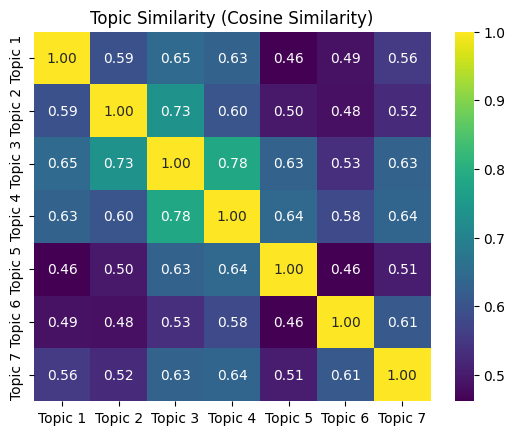

NameError: name 'kl_df' is not defined

In [19]:
import seaborn as sns

# Heatmap for cosine similarity
sns.heatmap(similarity_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Topic Similarity (Cosine Similarity)')
plt.show()

# Heatmap for KL divergence
sns.heatmap(kl_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Topic Divergence (KL Divergence)')
plt.show()


In [16]:
# Save the transposed DataFrame as a CSV file
topics_df_transposed.to_csv('topics_transposed.csv', index=True)


In [10]:
# Print the shape of the Document-Term Matrix
print("Shape of DTM (Document-Term Matrix):", dtm.shape)  # (num_documents, num_words)

# Topic-Word Matrix (components_ from LDA)
print("Shape of Topic-Word Matrix (LDA components_):", lda.components_.shape)  # (num_topics, num_words)

# Document-Topic Matrix (transform output from LDA)
document_topic_matrix = lda.transform(dtm)
print("Shape of Document-Topic Matrix:", document_topic_matrix.shape)  # (num_documents, num_topics)

# PCA-Reduced Topic Vectors
print("Shape of PCA-Reduced Topic Vectors:", topic_vectors.shape)  # (num_topics, num_components)


Shape of DTM (Document-Term Matrix): (2363, 94072)
Shape of Topic-Word Matrix (LDA components_): (7, 94072)
Shape of Document-Topic Matrix: (2363, 7)
Shape of PCA-Reduced Topic Vectors: (7, 3)


In [8]:
#most predominant topic
import numpy as np
import pandas as pd

# Assuming 'document_topic_matrix' is the (2363, 7) matrix generated by LDA.transform(dtm)
topic_sums = document_topic_matrix.sum(axis=0)  # Sum of weights for each topic
topic_proportions = topic_sums / topic_sums.sum()  # Normalize to get proportions

# Create a DataFrame for easy viewing
topics_summary = pd.DataFrame({
    'Topic': [f"Topic {i+1}" for i in range(len(topic_sums))],
    'Total Weight': topic_sums,
    'Proportion (%)': topic_proportions * 100
})

# Sort topics by total weight
topics_summary = topics_summary.sort_values(by='Total Weight', ascending=False)

# Display the results
print(topics_summary)


      Topic  Total Weight  Proportion (%)
1   Topic 2    646.541212       27.361033
9  Topic 10    590.346556       24.982927
0   Topic 1    318.261947       13.468555
7   Topic 8    259.292006       10.973001
4   Topic 5    154.106589        6.521650
6   Topic 7    141.421626        5.984834
8   Topic 9    113.422827        4.799950
3   Topic 4     76.417775        3.233930
2   Topic 3     47.118632        1.994017
5   Topic 6     16.070829        0.680103


In [5]:
# Step 4: Apply PCA to the scaled topic-word distribution matrix
pca = PCA(n_components=3)  # Reduce to 3 components
topic_vectors = pca.fit_transform(topic_word_matrix_scaled)  # Shape will be (num_topics, 3)

# Calculate and print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio by Component:")
for i, variance in enumerate(explained_variance_ratio, 1):
    print(f"Component {i}: {variance:.4f} ({variance * 100:.2f}%)")

print("\nCumulative Variance Explained:")
for i, cumulative in enumerate(cumulative_variance, 1):
    print(f"Up to Component {i}: {cumulative:.4f} ({cumulative * 100:.2f}%)")


Explained Variance Ratio by Component:
Component 1: 0.2505 (25.05%)
Component 2: 0.2264 (22.64%)
Component 3: 0.1679 (16.79%)

Cumulative Variance Explained:
Up to Component 1: 0.2505 (25.05%)
Up to Component 2: 0.4769 (47.69%)
Up to Component 3: 0.6448 (64.48%)


In [6]:
#now, how have these topic changed over time
# Get topic distribution for each document
document_topics = lda.transform(dtm)  # Shape: (num_documents, num_topics)

# Add topic distributions to the DataFrame
data['topic_distribution'] = list(document_topics)


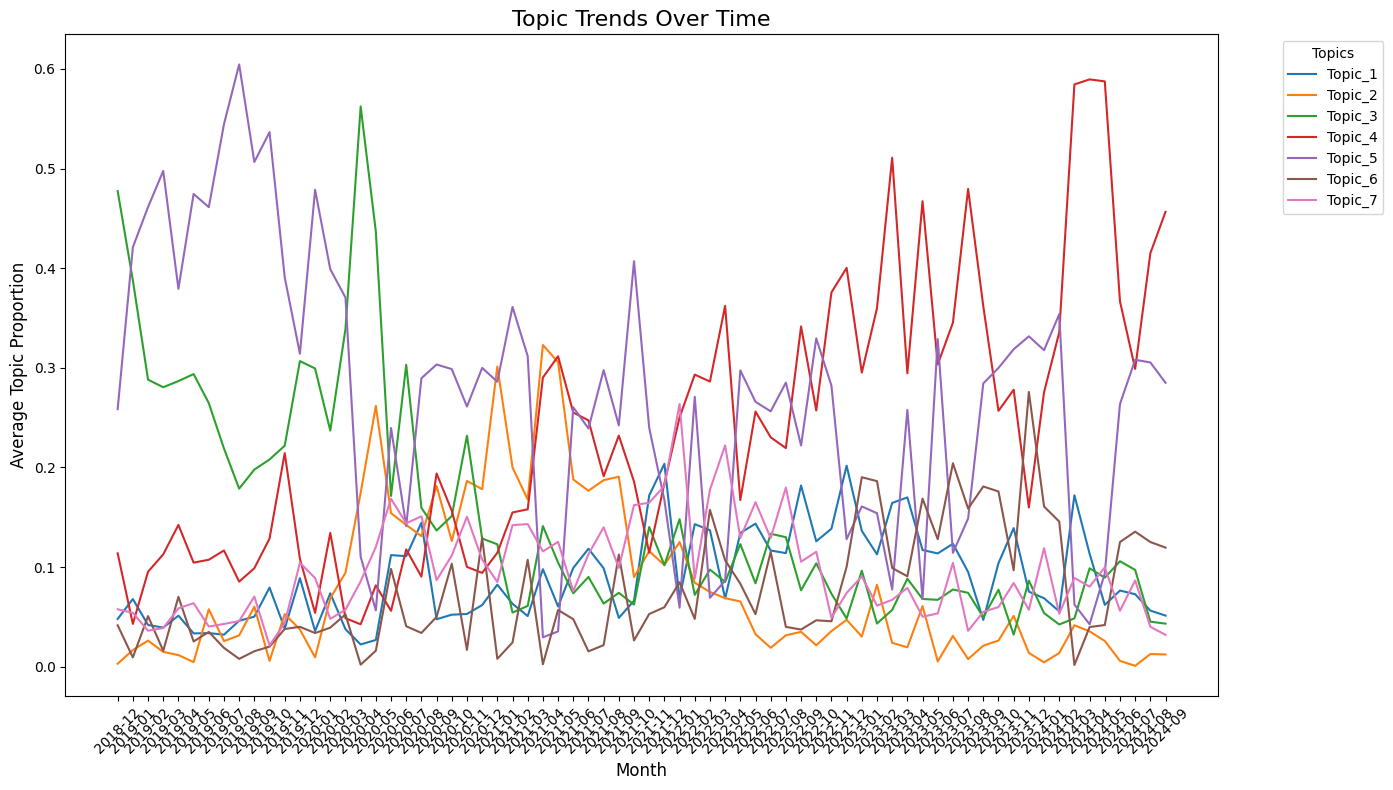

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Extract the month and year for grouping
data['month'] = data['date'].dt.to_period('M')  # Monthly aggregation, e.g., '2024-01'

# Get topic distribution for each document
document_topics = lda.transform(dtm)  # Transform documents into topic distributions

# Add the topic distribution to the DataFrame
data['topic_distribution'] = list(document_topics)

# Group by month and calculate the mean topic distribution for each month
topic_over_time = data.groupby('month')['topic_distribution'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)  # Stack and average the distributions
).reset_index()

# Convert topic distributions into separate columns for each topic
topic_columns = [f'Topic_{i + 1}' for i in range(lda.n_components)]
topic_trends = pd.DataFrame(
    topic_over_time['topic_distribution'].tolist(),
    columns=topic_columns
)
topic_trends['month'] = topic_over_time['month'].astype(str)

# Set the index to 'month' for easier plotting
topic_trends.set_index('month', inplace=True)

# Plot topic trends over time
plt.figure(figsize=(14, 8))
for topic in topic_columns:
    plt.plot(topic_trends.index, topic_trends[topic], label=topic)

# Customize the plot
plt.title('Topic Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Topic Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-14-66a2747ca3f7>:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', lda.n_components)  # Colormap for topics


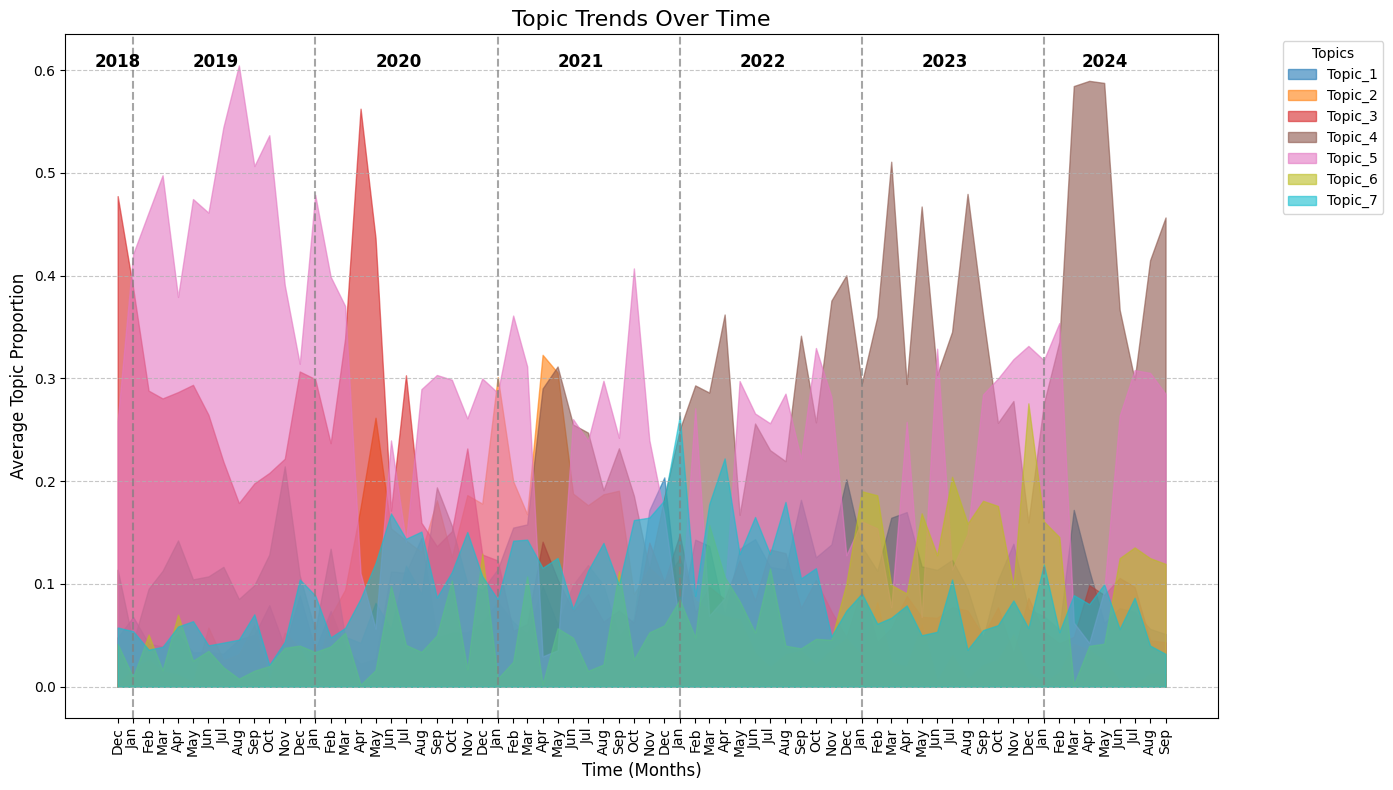

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# Extract the month and year for grouping
data['month'] = data['date'].dt.to_period('M')  # Monthly aggregation, e.g., '2024-01'

# Get topic distribution for each document
document_topics = lda.transform(dtm)  # Transform documents into topic distributions

# Add the topic distribution to the DataFrame
data['topic_distribution'] = list(document_topics)

# Convert topic distributions into a numpy array of floats
data['topic_distribution'] = data['topic_distribution'].apply(lambda x: np.array(x))

# Group by month and calculate the mean topic distribution for each month
topic_over_time = data.groupby('month')['topic_distribution'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)  # Stack and average the distributions
).reset_index()

# Convert topic distributions into separate columns for each topic
topic_columns = [f'Topic_{i + 1}' for i in range(lda.n_components)]
topic_trends = pd.DataFrame(
    topic_over_time['topic_distribution'].tolist(),
    columns=topic_columns
)
topic_trends['month'] = topic_over_time['month'].astype(str)

# Extract year and month separately for labeling
topic_trends['year'] = topic_trends['month'].str[:4]  # Extract year (first 4 characters)
topic_trends['month_label'] = topic_trends['month'].str[5:]  # Extract month (characters 5-7)
topic_trends['month_label'] = pd.to_datetime(topic_trends['month_label'], format='%m').dt.strftime('%b')  # Convert to short month names

# Set the index to 'month' for easier plotting
topic_trends.set_index('month', inplace=True)

# Convert 'month' to numerical format for plotting
topic_trends['numeric_month'] = mdates.date2num(pd.to_datetime(topic_trends.index))

# Plot area chart for topic trends
plt.figure(figsize=(14, 8))
cmap = plt.cm.get_cmap('tab10', lda.n_components)  # Colormap for topics

for i, topic in enumerate(topic_columns):
    plt.fill_between(
        topic_trends['numeric_month'],  # X-axis (time)
        topic_trends[topic],  # Y-axis (topic proportion)
        color=cmap(i),  # Assign color from colormap
        alpha=0.6,  # Transparency level
        label=topic  # Add label for legend
    )

# Customize the x-axis for year sections and month labels
unique_years = topic_trends['year'].unique()
x_labels = []
x_positions = []

# Collect month labels and positions
for year in unique_years:
    year_data = topic_trends[topic_trends['year'] == year]
    x_labels.extend(year_data['month_label'].tolist())
    x_positions.extend(year_data['numeric_month'].tolist())

# Set x-ticks and labels
plt.xticks(
    ticks=x_positions,
    labels=x_labels,
    rotation=90,
    fontsize=10
)

# Add vertical lines to separate years
for year in unique_years[1:]:
    split_index = topic_trends[topic_trends['year'] == year].index[0]
    plt.axvline(mdates.date2num(pd.to_datetime(split_index)), color='gray', linestyle='--', alpha=0.7)

# Annotate years in the middle of their sections
for year in unique_years:
    year_data = topic_trends[topic_trends['year'] == year]

    # Calculate the midpoint by converting datetime indices to numerical values
    num_dates = mdates.date2num(pd.to_datetime(year_data.index))  # Convert to numerical values
    midpoint = np.mean(num_dates)  # Mean of numerical values

    # Convert the midpoint back to a datetime object
    midpoint_date = mdates.num2date(midpoint)

    # Convert midpoint_date back to string format for text annotation
    midpoint_str = midpoint_date.strftime('%Y')

    plt.text(
        midpoint_date,
        plt.ylim()[1] * 0.95,
        midpoint_str,
        fontsize=12,
        color='black',
        fontweight='bold',
        horizontalalignment='center'
    )

# Additional plot customizations
plt.title('Topic Trends Over Time', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Average Topic Proportion', fontsize=12)
plt.legend(title='Topics', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
import numpy as np

# Step 1: Extract top 100 words for each topic from LDA model
# Assuming `lda` is your trained LDA model and `vectorizer` is the CountVectorizer used to fit the DTM

def get_top_words_per_topic(lda, vectorizer, num_words=300):
    top_words_per_topic = []
    vocab = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]  # Get top 100 word indices per topic
        top_words = [vocab[i] for i in top_words_idx]
        top_words_per_topic.append(' '.join(top_words))  # Join top words into a single text for each topic
    return top_words_per_topic

top_words_per_topic = get_top_words_per_topic(lda, vectorizer, num_words=100)

# Step 2: Apply sentiment analysis to the topic-based text representations
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=0)

def compute_sentiment_for_topic(topic_text):
    try:
        # Compute sentiment score for the topic's text representation
        result = sentiment_analyzer(topic_text)[0]
        score = result['score'] * (1 if result['label'] in ['POSITIVE', '5 stars'] else -1)
        return score
    except Exception as e:
        return None

# Step 3: Apply the sentiment analysis to the top words for each topic
topic_sentiments = [compute_sentiment_for_topic(topic_text) for topic_text in top_words_per_topic]

# Step 4: Display results
for idx, sentiment_score in enumerate(topic_sentiments):
    print(f"Topic {idx + 1}: Sentiment Score: {sentiment_score}")



Topic 1: Sentiment Score: -0.5150809288024902
Topic 2: Sentiment Score: -0.6059063673019409
Topic 3: Sentiment Score: -0.5147299766540527
Topic 4: Sentiment Score: -0.6449887752532959
Topic 5: Sentiment Score: -0.5324192643165588
Topic 6: Sentiment Score: -0.3263464570045471
Topic 7: Sentiment Score: -0.6420092582702637
